In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver3D as s3
import matrix2D as m2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh = IntervalMesh(20, 0, 1)

time=0: 
iter=1: norm=7.90254e-06
Solving linear variational problem.


HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5F.c line 620 in H5Fopen(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #001: H5VLcallback.c line 3501 in H5VL_file_open(): failed to iterate over available VOL connector plugins
    major: Virtual Object Layer
    minor: Iteration failed
  #002: H5PLpath.c line 578 in H5PL__path_table_iterate(): can't iterate over plugins in plugin path '(null)'
    major: Plugin for dynamically loaded library
    minor: Iteration failed
  #003: H5PLpath.c line 620 in H5PL__path_table_iterate_process_path(): can't open directory: /home/saragazzoni/miniconda3/envs/myfenics/lib/hdf5/plugin
    major: Plugin for dynamically loaded library
    minor: Can't open directory or file
  #004: H5VLcallback.c line 3351 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #005: H5VLnative_file.c line 97 in H5VL__native_file_open(): unable to open file
    major: File

(2079, 2079)


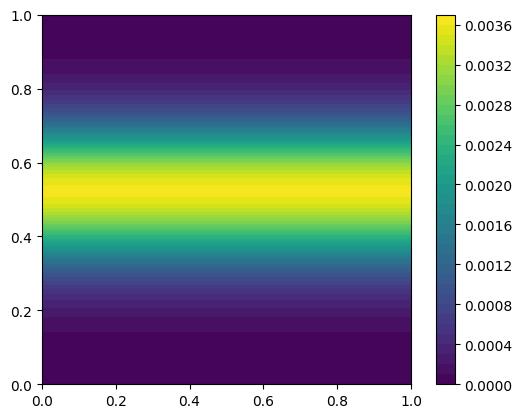

time=0.5: 
iter=1: norm=0.00173626
iter=2: norm=3.35491e-06
Solving linear variational problem.
Solving linear variational problem.
(2079, 2079)


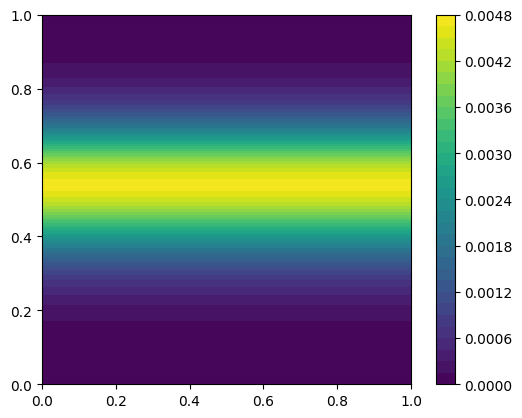

time=1: 
iter=1: norm=0.000371193
Solving linear variational problem.
(2079, 2079)


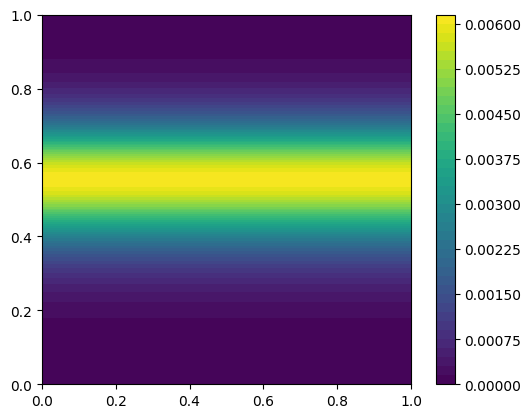

time=1.5: 
iter=1: norm=0.000464792
Solving linear variational problem.
(2079, 2079)


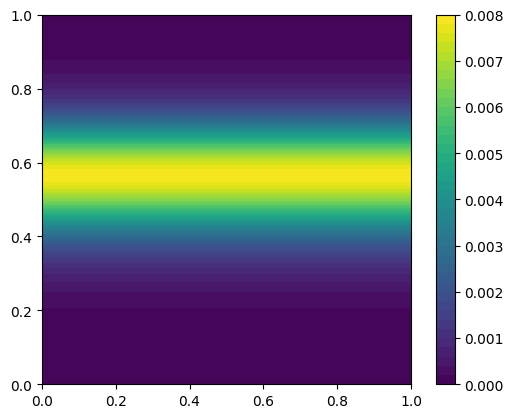

time=2: 
iter=1: norm=0.000579709
Solving linear variational problem.
(2079, 2079)


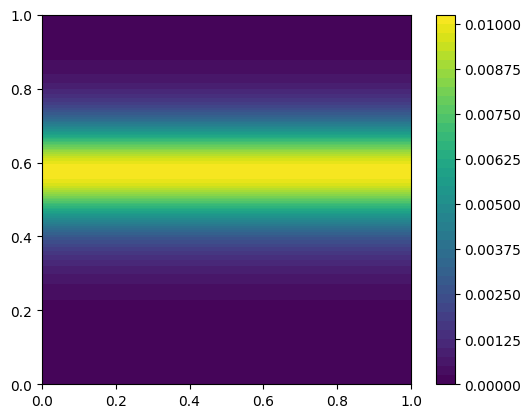

time=2.5: 
iter=1: norm=0.000720885
Solving linear variational problem.
(2079, 2079)


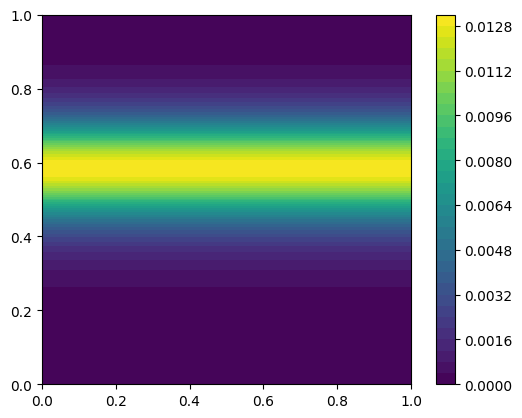

time=3: 
iter=1: norm=0.000893302
Solving linear variational problem.
(2079, 2079)


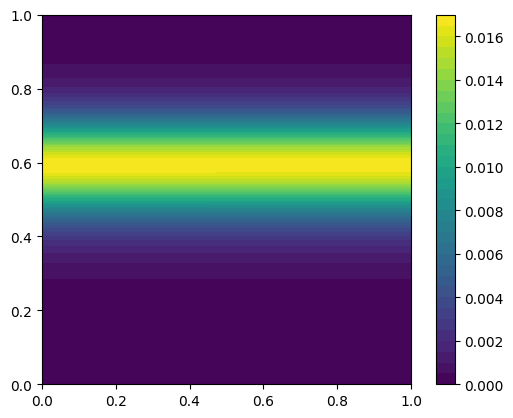

time=3.5: 
iter=1: norm=0.00110255
iter=2: norm=7.16461e-06
Solving linear variational problem.
Solving linear variational problem.
(2079, 2079)


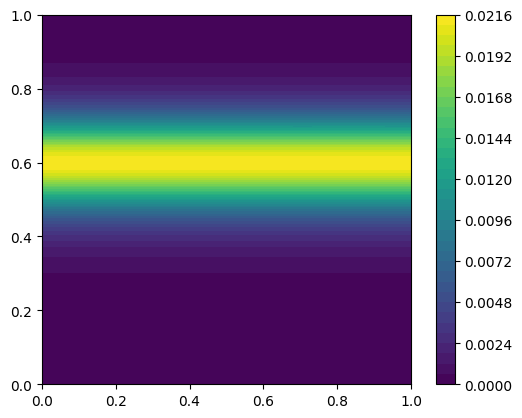

time=4: 
iter=1: norm=0.00134771
iter=2: norm=1.07724e-05
Solving linear variational problem.
Solving linear variational problem.


KeyboardInterrupt: 

In [3]:
m0 = 1e-3
dt = 0.5
T = 20
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/test1D_flip"

solver = s3.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
mass,x_vect = solver.solve()

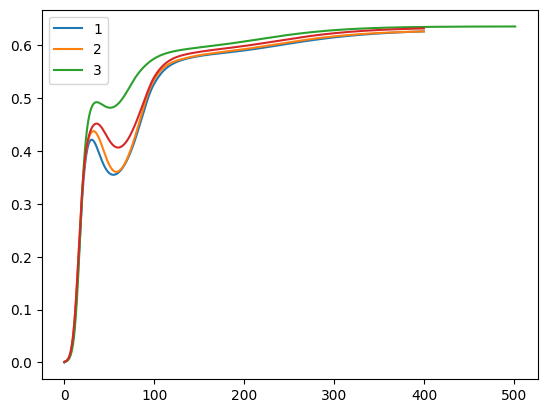

In [5]:
mass = np.load('solutions/test400/mass.npy')
time1 = np.arange(0,100,0.5)
time2 = np.arange(0,400,0.5)
plt.plot(time2,mass)
mass2 = np.load('solutions/test1D_modifiche/mass.npy')
plt.plot(time2,mass2)
mass3 = np.load('../Model1D/solutions/B_Km0.005/mass.npy')
time3 = np.arange(0,501,0.1)
plt.plot(time3,mass3)
mass4 = np.load('solutions/t400_masses/mass.npy')
plt.plot(time2,mass4)
plt.legend(['1','2','3'])

0.24418796908548288 0.3319139557634957 0.42461228432907794
[0.00120422 0.00146021 0.00178022 0.00217927 0.00267539 0.00328999
 0.00404827 0.00497958 0.0061178  0.00750149 0.00917409 0.01118384
 0.01358357 0.01643021 0.01978403 0.02370755 0.02826412 0.03351618
 0.03952311 0.0463389  0.0540096  0.06257059 0.07204399 0.08243613
 0.09373608 0.10591367 0.11891888 0.13268196 0.14711427 0.16210961
 0.17754764 0.19329612 0.20921461 0.22515819 0.2409813  0.25653934
 0.27169783 0.28633166 0.30033027 0.31360158 0.32607582 0.33770312
 0.3484711  0.35838855 0.36748422 0.37579929 0.38338022 0.3902814
 0.39654147 0.40220374 0.40730966 0.4118982  0.41600569 0.41966583
 0.42291698 0.42578052 0.42828101 0.4304418  0.43228418 0.43383408
 0.43510314 0.43610507 0.43685333 0.43736687 0.43765261 0.43771889
 0.43758156 0.43723841 0.43670515 0.43598744 0.43509241 0.43402736
 0.43280014 0.43141904 0.42989284 0.42823464 0.42645371 0.42455968
 0.42256261 0.42047288 0.41830117 0.41605836 0.41375549 0.4114037
 0.40

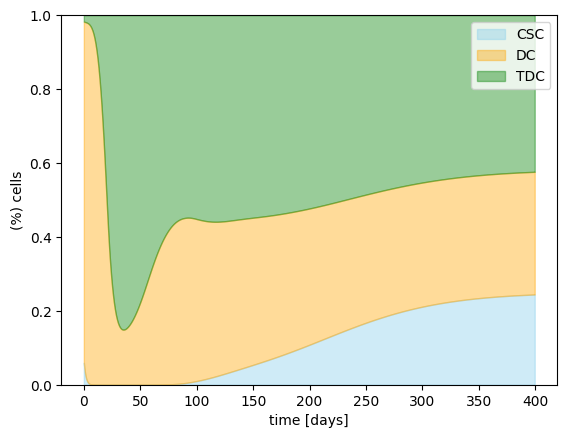

In [6]:
csc = np.load('solutions/test1D_modifiche/csc_mass.npy')
dc = np.load('solutions/test1D_modifiche/dc_mass.npy')
tdc = np.load('solutions/test1D_modifiche/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
print(csc[-1],dc[-1],tdc[-1])
print(mass2)

time=np.arange(0,400,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])

## 2D

In [1]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import matrix2D as m2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh2D = UnitSquareMesh(20,20)

time=0: 
iter=1: norm=7.90254e-06
Solving linear variational problem.


HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5F.c line 620 in H5Fopen(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #001: H5VLcallback.c line 3501 in H5VL_file_open(): failed to iterate over available VOL connector plugins
    major: Virtual Object Layer
    minor: Iteration failed
  #002: H5PLpath.c line 578 in H5PL__path_table_iterate(): can't iterate over plugins in plugin path '(null)'
    major: Plugin for dynamically loaded library
    minor: Iteration failed
  #003: H5PLpath.c line 620 in H5PL__path_table_iterate_process_path(): can't open directory: /home/saragazzoni/miniconda3/envs/myfenics/lib/hdf5/plugin
    major: Plugin for dynamically loaded library
    minor: Can't open directory or file
  #004: H5VLcallback.c line 3351 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #005: H5VLnative_file.c line 97 in H5VL__native_file_open(): unable to open file
    major: File

LGMRES converged [iter= 1, time=0.80s, res=2.2e-10]
441
441
441


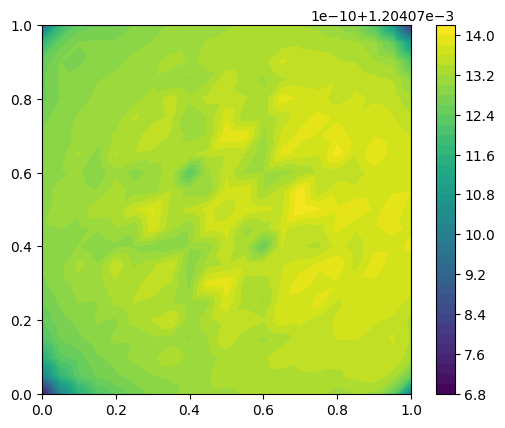

time=0.5: 
iter=1: norm=0.00173604
Solving linear variational problem.
iter=2: norm=3.35407e-06
Solving linear variational problem.
LGMRES converged [iter= 1, time=0.73s, res=2.7e-10]
441
441
441


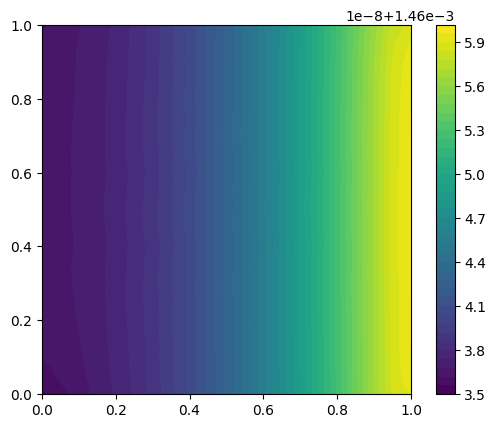

time=1: 
Solving linear variational problem.
iter=1: norm=0.000371168
LGMRES converged [iter= 1, time=0.74s, res=3.2e-10]
441
441
441


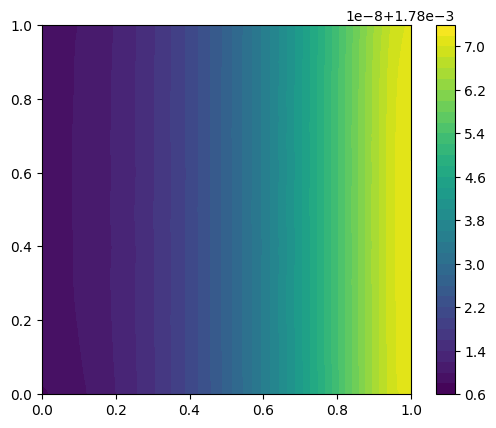

time=1.5: 
Solving linear variational problem.
iter=1: norm=0.000464763
LGMRES converged [iter= 1, time=0.80s, res=3.7e-10]
441
441
441


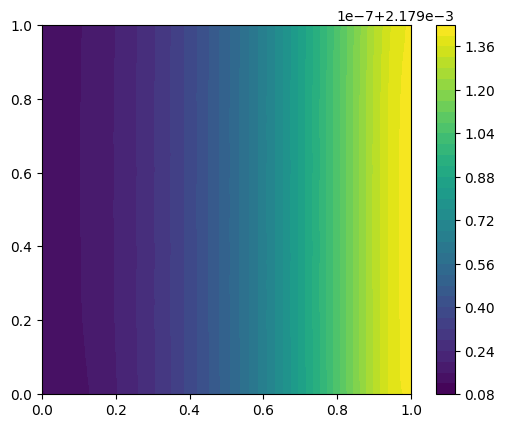

In [3]:
m0 = 1e-3
dt = 0.5
T = 2
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V2D = FunctionSpace(mesh2D,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V2D)
path_sol = "solutions/prove"

solver = m2.MatrixSolver(mesh2D, V2D, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
mass,x_vect = solver.solve()

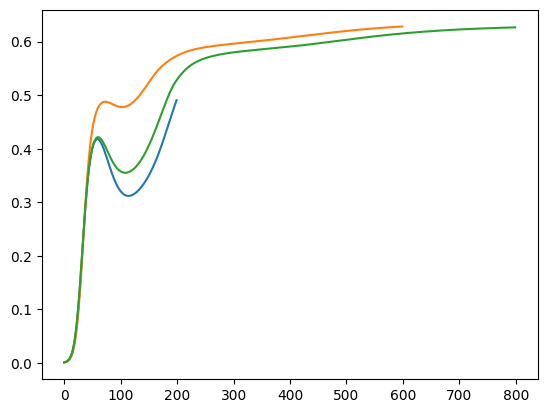

In [4]:
mass = np.load('solutions/test2D_P2/mass.npy')
plt.plot(mass)
mass2 = np.load('../Model2D/solutions/m01e-3_T300_mesh10/mass.npy')
plt.plot(mass2)
mass3 = np.load('solutions/test2D_masses/mass.npy')
plt.plot(mass3)
# plt.xlim([0,600])

0.21497386645272817 0.34561318326575957 0.43941295028151256
0.4904363050464665


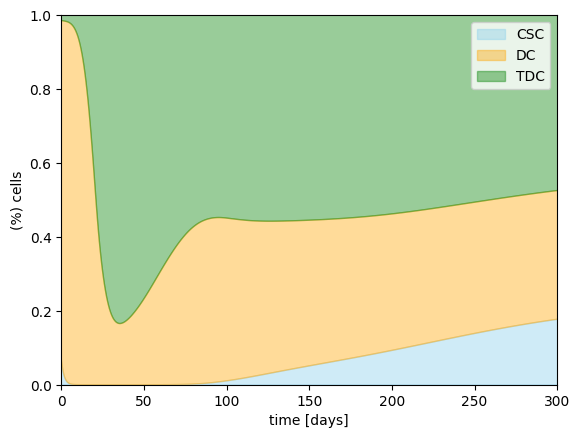

In [5]:
csc = np.load('solutions/test2D_masses/csc_mass.npy')
dc = np.load('solutions/test2D_masses/dc_mass.npy')
tdc = np.load('solutions/test2D_masses/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
print(csc[-1],dc[-1],tdc[-1])
print(mass[-1])

time=np.arange(0,400,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
plt.xlim([0,300])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
